# 改进的Euler方法

将公式 $y(x_{k+1}) = y(x_{k}) + \Delta x * y'(\epsilon)$ 中的 $\epsilon$ 不只使用左端点, 而是使用左右两个端点, 即求积方法中的梯形公式

$$y(x_{k+1}) = y(x_{k}) + \Delta x * \frac{y'(x_{k}) + y'(x_{k+1})}{2}$$

因此改进的Euler方法是隐式方法, 其绝对稳定域为$\lambda h < 0$, 但缺点是需要迭代求解

**为了避免迭代求解方程**, 通过**显式法预测+隐式法校正**的方式进行求解, 此时稳定域会减小

$$\left. \begin{array}  { l  }  { y _ { k + 1 } ^{(1)}= y _ { k } + h * f ( x _ { k } , y _ { k } ) } \\ { y _ { k + 1 } = y _ { k } + h  * \frac { f ( x _ { k } , y _ { k } ) + f ( x _ { k + 1 } , y _ { k + 1 } ^{(1)} ) } { 2 }  } \end{array} \right.$$

In [13]:
from math import exp

from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文


def improve_euler(x, b, y, h, f):
    result = {x: y}
    while True:
        if x >= b:
            break
        # euler公式预测
        y_tmp = y + h * f(x, y)
        # 改进euler公式校正
        y = y + h * (f(x, y) + f(x + h, y_tmp)) / 2
        x = x + h
        result[x] = y
    return result


In [20]:
def y_grad(x, y):
    return -100 * y


def actual_f(x):
    return exp(-100 * x)


x0 = 0
b = 0.1
y0 = 1
h = 0.015
xydict = improve_euler(x0, b, y0, h, y_grad)


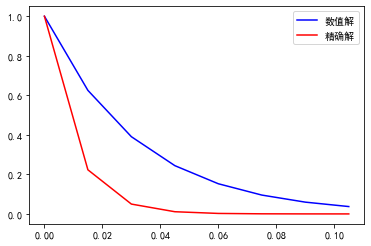

In [21]:
plt.plot(xydict.keys(), xydict.values(), 'b-', label='数值解')

plt.plot(xydict.keys(), [actual_f(x) for x in xydict.keys()], 'r-', label='精确解')

plt.legend()
plt.show()